In [2]:
import praw
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
reddit = praw.Reddit(client_id='RZPe8oPVpuj70A',
                     client_secret='pcRX9Dxyje7cp8CWP2Ocyxq8nJs7VQ',
                     user_agent='my user agent',
                     username='Sneha725',
                     password='Sneha725')

In [4]:
def get_posts(sub_name, n):
    subreddit = reddit.subreddit(sub_name)
    posts_list = [] 
    
    for submission in subreddit.top(limit=n):
        info_list = []
        info_list.append(submission.id)   # Output: the submission's title
        info_list.append(submission.score)  # Output: the submission's score  
        info_list.append(str(submission.author)) 
        info_list.append(submission.num_comments)
        info_list.append(submission.subreddit)
        posts_list.append(info_list)
    
    a = sorted(posts_list, key=lambda x: x[1], reverse = True)
    posts_df = pd.DataFrame(a, columns = ['id', 'score', 'author', 'num_comments', 'subreddit'])
    return posts_df

In [5]:
def get_comments(subm_id, n): 
    
    com_list = []
    submission = reddit.submission(id = subm_id)
    i = 0
    for comment in submission.comments:
        info_list = []
            # Top 3 comments for each submission
        if i <= n:
            info_list.append(comment.id)
            info_list.append(comment.score)
            info_list.append(comment.author)
            info_list.append(submission.subreddit)
            #info_list.append(submission.comments.list()[i].body)
            i += 1
            com_list.append(info_list)
        else:
            break
    
    a = sorted(com_list, key=lambda x: x[1], reverse = True)
    com_df = pd.DataFrame(a)
    return com_df

In [6]:
def get_user_posts(author, n):
    
    redditor = reddit.redditor(author)
    user_posts_list = []
    
    for submission in redditor.submissions.top(limit = n):
        info_list = []
        info_list.append(submission.id)
        info_list.append(submission.score)
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(str(submission.subreddit))
        user_posts_list.append(info_list)
    
    a = sorted(user_posts_list, key=lambda x: x[1], reverse = True)
    user_posts_df = pd.DataFrame(a)
    return user_posts_df

In [309]:
indiaspeaks = get_posts('indiaspeaks', 1000)

In [328]:
indiaspeaks

id  score         author  num_comments    subreddit
0    iba1wp   5413  nightrider-91           685  IndiaSpeaks
1    ga4g83   3818           None           216  IndiaSpeaks
2    gjbja3   3571  dodgevipert56           730  IndiaSpeaks
3    gy8hfx   3562       Busy_Art           129  IndiaSpeaks
4    ibx55r   3423   BigSurround2           227  IndiaSpeaks
..      ...    ...            ...           ...          ...
993  jly60e    575    sarinmall85            11  IndiaSpeaks
994  frt3g7    575   AmitNair4175           100  IndiaSpeaks
995  f1oh6z    574        yeloblu            48  IndiaSpeaks
996  e93y7e    573     UUUU__UUUU            27  IndiaSpeaks
997  fgwyck    567   AmitNair4175            66  IndiaSpeaks

[998 rows x 5 columns]

In [327]:
india = get_posts('india', 1000)
india

KeyboardInterrupt: 

In [326]:
repeating1 = india[india.duplicated(['author'], keep = False)]
repeating2 = indiaspeaks[indiaspeaks.duplicated(['author'], keep = False)]
print(repeating1)
print(repeating2)

         id  score              author  num_comments subreddit
4    h8q51x  17058    GoneHippocamping           464     india
7    fv8xxe  13581    randomvariable10           306     india
8    hajudt  12860             dlisfyn           531     india
9    i82olz  12428    theancientofdayz          1010     india
10   gtxidr  12155       Fabulous-Rice           532     india
..      ...    ...                 ...           ...       ...
960  fjx9ih   2076         madamplease           306     india
970  gkg4hx   2061               Ku_hu           132     india
974  8r93fv   2058          thelielmao           120     india
977  f49r0g   2052  wannasleepsomemore            87     india
978  f3nhyr   2052             mayblum           458     india

[462 rows x 5 columns]
         id  score        author  num_comments    subreddit
1    ga4g83   3818          None           216  IndiaSpeaks
3    gy8hfx   3562      Busy_Art           129  IndiaSpeaks
4    ibx55r   3423  BigSurround2        

In [353]:
u_authors1 = list(repeating1.author.unique())
u_authors2 = list(repeating2.author.unique())
u_authors = u_authors1 + u_authors1
u_authors

['GoneHippocamping',
 'randomvariable10',
 'dlisfyn',
 'theancientofdayz',
 'Fabulous-Rice',
 'None',
 'pooniahigh',
 'sudden_dust',
 'AatmanirbharBerojgar',
 'keh_k_lenge',
 'sinsandtonic',
 'maxmess',
 'iSalaamU',
 'Lowcrbnaman',
 'cetrog',
 'ironypatrol',
 'sharan480',
 'iSubhi2012',
 'deadbroccoli',
 'ajayshinde74',
 'beyond9thousand',
 'vpsj',
 'Anubhav_xx',
 'jatadharius',
 'reva_r',
 'artanurag',
 'Gavthi_Batman',
 'bhodrolok',
 'anonymouse_2001',
 'sir_qoala',
 'dingdongmafia',
 'Roznick',
 'wordswithmagic',
 'crasshumor',
 'aradhya23',
 'SumoneSumwere',
 'DvelDeveloper',
 'fourteenpoints',
 'satyasys',
 'SanskariNari',
 'madamplease',
 'shyggar',
 'an8hu',
 'IAmMohit',
 'Medhavi321',
 'pink_vanilla_skies',
 'EddieEhlriCh',
 '--5-',
 'ppatra',
 'SharkThug',
 'tilismilis',
 'BabaGyaanchod',
 'amnruti',
 'mydriase',
 'xarteztx',
 'mayblum',
 'SpiritualHawk420',
 'redditsuckmya',
 'hipporama',
 'BenderRodriguez94',
 'ChumbaWambah',
 '_eipeidweP_',
 'Gamer-Varad',
 'I_can_believe_t

In [354]:
from prawcore.exceptions import Forbidden


authors_df1 =  pd.DataFrame() # Makes an empty dataframe

authors_df1 = authors_df1.fillna(0)

for u in u_authors1: # Loops through every "influencer" user and gets 10 top posts per user
    try:
        c = get_user_posts(u, 10)
        authors_df1 = pd.concat([authors_df1, c])
    except:
        print("there is an exception")

there is an exception
there is an exception
there is an exception
there is an exception
there is an exception


In [49]:
authors_df2 =  pd.DataFrame() # Makes an empty dataframe

authors_df2 = authors_df2.fillna(0)

for u in u_authors2: # Loops through every "influencer" user and gets 10 top posts per user
    try:
        c = get_user_posts(u, 10)
        authors_df2 = pd.concat([authors_df2, c])
    except:
        print("there is an exception")

there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception
there is an exception


In [50]:
authors_df1


0      1                 2    3               4
0   h8q51x  17059  GoneHippocamping  464           india
1   hmcb22   6230  GoneHippocamping   27  wholesomememes
2   i7mcaa   5560  GoneHippocamping  184           india
3   i2gpcx   1589  GoneHippocamping   46           islam
4   ebby4a   1435  GoneHippocamping   64           india
..     ...    ...               ...  ...             ...
5   fk3b1m   2381    AmIWrongEnough  231     Coronavirus
6   e5y3gy   2223    AmIWrongEnough  186           india
7   ecr625   2186    AmIWrongEnough  152           india
8   g5b7ul   1762    AmIWrongEnough  146     Coronavirus
9   duwkbm   1522    AmIWrongEnough   89           space

[923 rows x 5 columns]

In [51]:
authors_df2

0      1           2     3                  4
0   gy8hfx   3562    Busy_Art   129        IndiaSpeaks
1   ghf6c4   2695    Busy_Art   265        IndiaSpeaks
2   ghfvgw   2402    Busy_Art   108              Chodi
3   h9eem5   2388    Busy_Art   293        IndiaSpeaks
4   gvm3k2   1767    Busy_Art   218              Chodi
..     ...    ...         ...   ...                ...
5   cb7lo9  59607  drsleep007   390    oddlysatisfying
6   c8lmkj  58449  drsleep007   438              memes
7   bu3n63  52299  drsleep007  1032  interestingasfuck
8   ck7518  49028  drsleep007  2714           politics
9   c9hxzl  46878  drsleep007   681               pics

[983 rows x 5 columns]

In [355]:
x = [authors_df1, authors_df2]
tweets3 = pd.concat(x)
tweets3
counts = tweets3.iloc[:,4].value_counts()

tweets3 = tweets3[~tweets3.iloc[:,4].isin(counts[counts < 10].index)]

counts = tweets3.iloc[:,2].value_counts()

tweets3 = tweets3[~tweets3.iloc[:,2].isin(counts[counts < 5].index)]

In [356]:
x = [authors_df1, authors_df2]
tweets3 = pd.concat(x)
tweets3
subredditname = tweets3.iloc[:,4]

tweets3 = tweets3[(tweets3.iloc[:,4] == 'IndiaSpeaks') | (tweets3.iloc[:,4] == 'memes') |(tweets3.iloc[:,4] == 'india')|(tweets3.iloc[:,4] == 'Chodi')]


In [357]:
tweets3['following'] = tweets3.iloc[:,4]
tweets3['person_name'] = tweets3.iloc[:,2]

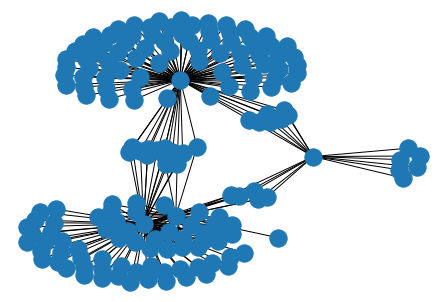

In [358]:
g = nx.from_pandas_edgelist(tweets3, source='following', target='person_name') # Initial ugly approach, decided to keep it
nx.draw(g)

In [370]:
u_authors1 = tweets3['following'].unique()
u_authors2 = tweets3['person_name'].unique()

In [386]:
subs = list(tweets3.person_name.unique()) # Make list of unique subreddits to use in network graph
subs1 = list(tweets3.following.unique())

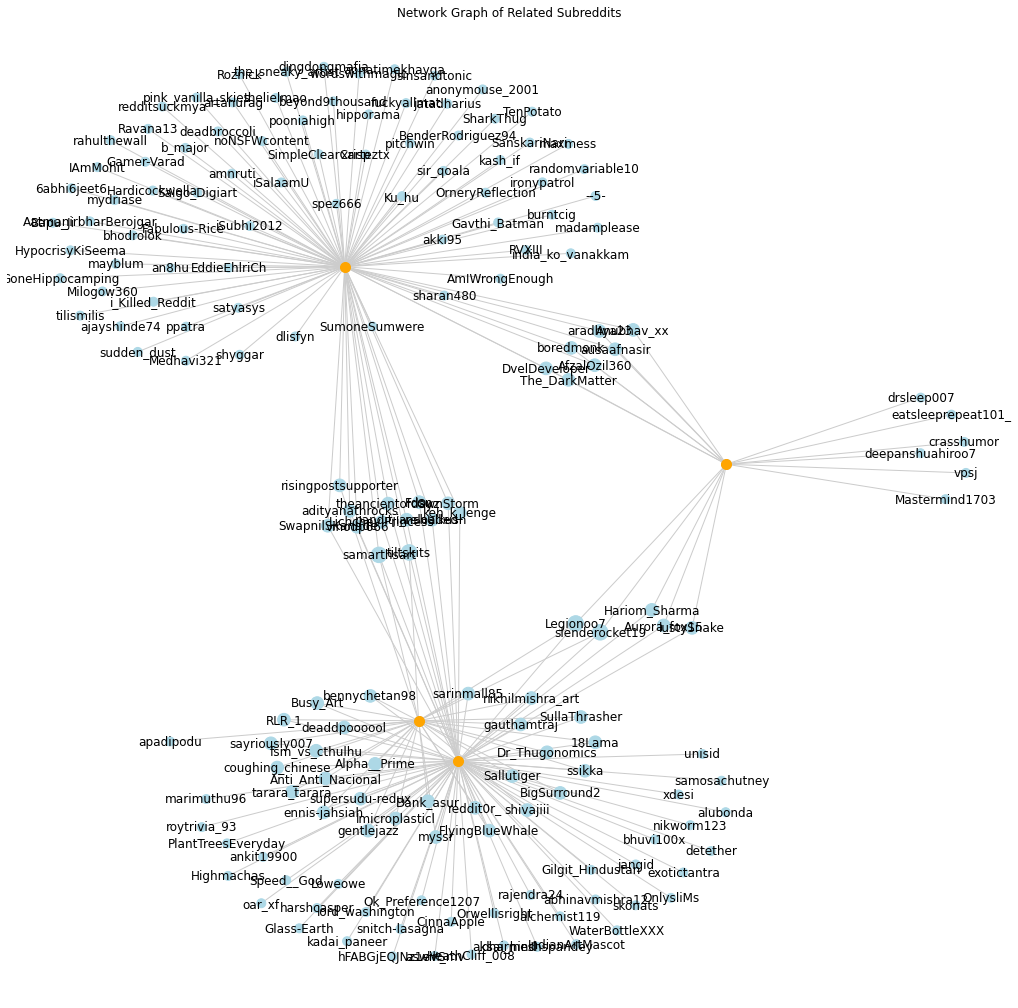

In [387]:
plt.figure(figsize=(18, 18))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(tweets3, source='following', target='person_name') 

# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=50,scale=2)

# Draw the parts we want, edges thin and grey
# Influencers appear small and grey
# Subreddits appear in blue and sized according to their respective number of connections.
# Labels for subreddits ONLY
# People who have more connections are highlighted in color 

# Go through every subbreddit, ask the graph how many connections it has. 
# Multiply that by 80 to get the circle size
sub_size = [g.degree(sub) * 80 for sub in subs]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=subs, 
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all the entities 
nx.draw_networkx_nodes(g, layout, nodelist=u_authors1, node_color='#cccccc', node_size=100)

# Draw highly connected influencers 
popular_people = [person for person in u_authors1 if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(subs, subs)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

# No axis needed
plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph", bbox_inches='tight',pad_inches=0.5)
plt.show()

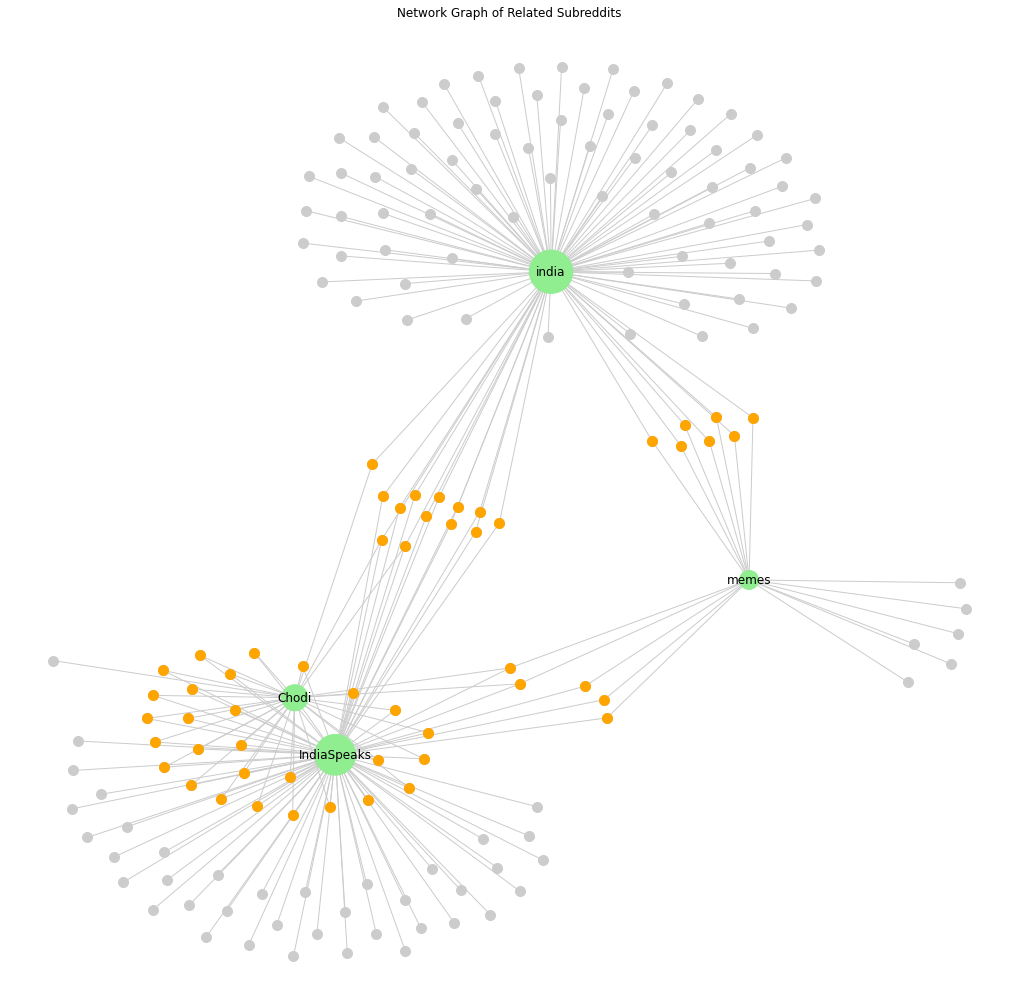

In [391]:
plt.figure(figsize=(18, 18))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(tweets3, source='following', target='person_name') 

# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=50,scale=2)

# Draw the parts we want, edges thin and grey
# Influencers appear small and grey
# Subreddits appear in blue and sized according to their respective number of connections.
# Labels for subreddits ONLY
# People who have more connections are highlighted in color 

# Go through every subbreddit, ask the graph how many connections it has. 
# Multiply that by 80 to get the circle size
sub_size = [g.degree(sub) * 20 for sub in subs1]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=subs1, 
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightgreen')

# Draw all the entities 
nx.draw_networkx_nodes(g, layout, nodelist=u_authors2, node_color='#cccccc', node_size=100)

# Draw highly connected influencers 
popular_people = [person for person in u_authors2 if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(subs1, subs1)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

# No axis needed
plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph", bbox_inches='tight',pad_inches=0.5)
plt.show()

In [339]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') # Initial ugly approach, decided to keep it
nx.draw(g)

In [337]:
following_weights['mention_weights']= 2
following_weights

source       target  mention_weights  source_id  target_id  \
0                    --5-        india                2          0        113   
1                  18Lama        Chodi                2          1         14   
2                  18Lama  IndiaSpeaks                2          1         34   
3             6abhi6jeet6        india                2          2        113   
4    AatmanirbharBerojgar        india                2          3        113   
..                    ...          ...              ...        ...        ...   
224             vinodp666        india                2        171        113   
225                  vpsj        memes                2        172        128   
226        wordswithmagic        india                2        173        113   
227              xarteztx        india                2        174        113   
228                 xdesi  IndiaSpeaks                2        175         34   

     n_weights  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
224          1  
225          1  
226          1  
227          1  
228          1  

[229 rows x 6 columns]

In [330]:

all_nodes = set(following_weights['source'].drop_duplicates()) | set(following_weights['target'].drop_duplicates())
all_nodes = sorted(list(all_nodes))
node_map = dict(enumerate(all_nodes))
node_map_inv = {v : k for k, v in node_map.items()}

following_weights['source_id'] = following_weights['source'].map(node_map_inv)
following_weights['target_id'] = following_weights['target'].map(node_map_inv)


nodes = pd.DataFrame(list(node_map.items()), columns=['index', 'username'])

In [331]:
import pandas as pd
import numpy as np
import matplotlib
import graph_tool.all as gt

In [332]:
nodes = nodes
edges = following_weights
edges["n_weights"] = (edges[["mention_weights"]] > 0).sum(axis="columns")
edges["n_weights"]

0      1
1      1
2      1
3      1
4      1
      ..
224    1
225    1
226    1
227    1
228    1
Name: n_weights, Length: 229, dtype: int64

In [333]:
node_map = {row.index : row.username for row in nodes.itertuples()}

node_map_inv = {v : k for (k, v) in node_map.items()}

edge_map = {row.Index : (row.source_id, row.target_id) for row in edges.itertuples()}
edge_map_inv = {v : k for (k, v) in edge_map.items()}

In [334]:
mention_weights, n_weights = {}, {}

for edge in edges.itertuples():
    mention_weights[(edge.source_id, edge.target_id)] = edge.mention_weights
    n_weights[(edge.source_id, edge.target_id)] = edge.n_weights

In [335]:
g = gt.Graph()
g.add_vertex(len(node_map))
for edge in edge_map:
    source, target = edge_map[edge]
    g.add_edge(g.vertex(source), g.vertex(target))

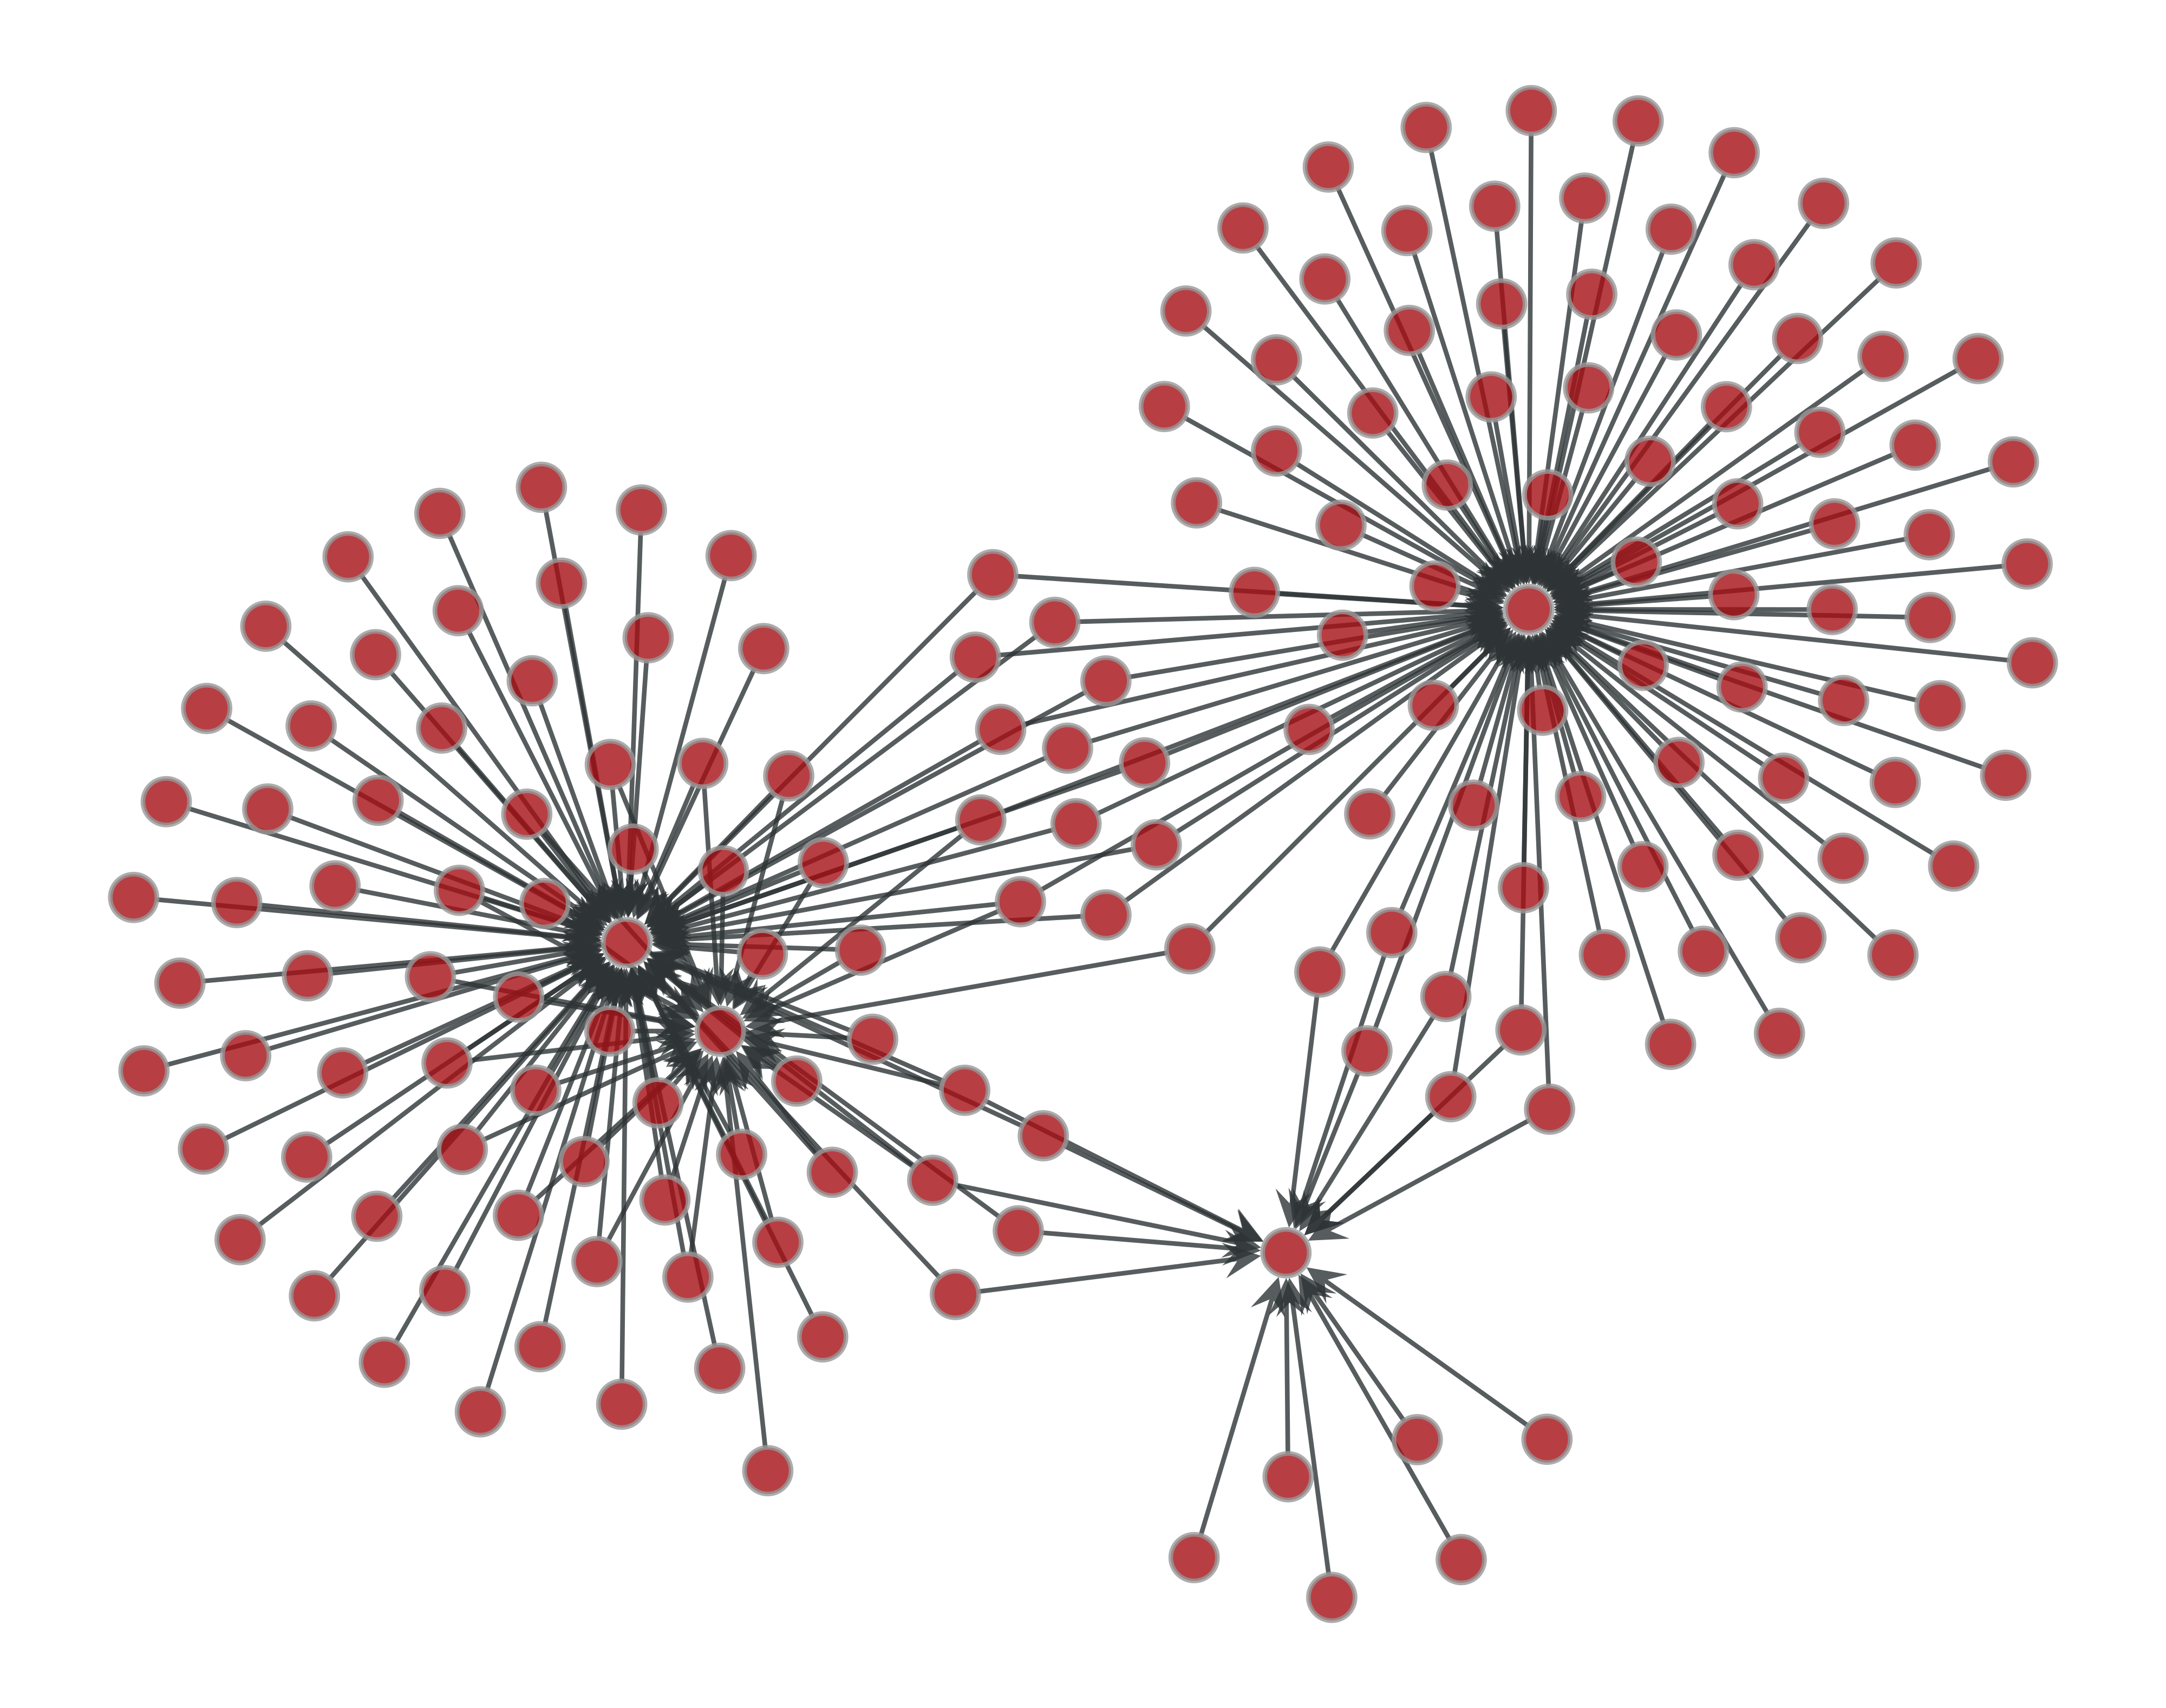

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fbe13d023d0, at 0x7fbe13908be0>

In [336]:
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, output_size=(2000,2000))

In [237]:
vertex_name = g.new_vertex_property("string", vals=nodes['username'].values)

# Edge Properties (Weights)

mention_weights_pm = g.new_edge_property("float", vals=[i[1] for i in sorted(mention_weights.items())])
n_weights_pm = g.new_edge_property("float", vals=[i[1] for i in sorted(n_weights.items())])

## Log Edge Properties
mention_weights_log_pm = g.new_edge_property("float", vals=[np.log1p(i[1]) for i in sorted(mention_weights.items())])

# Make Property Maps Internal to Graph
g.vertex_properties["vertex_name"] = vertex_name
g.edge_properties["mention_weights"] = mention_weights_pm
g.edge_properties["n_weights"] = n_weights_pm
g.edge_properties["mention_weights_log"] = mention_weights_log_pm



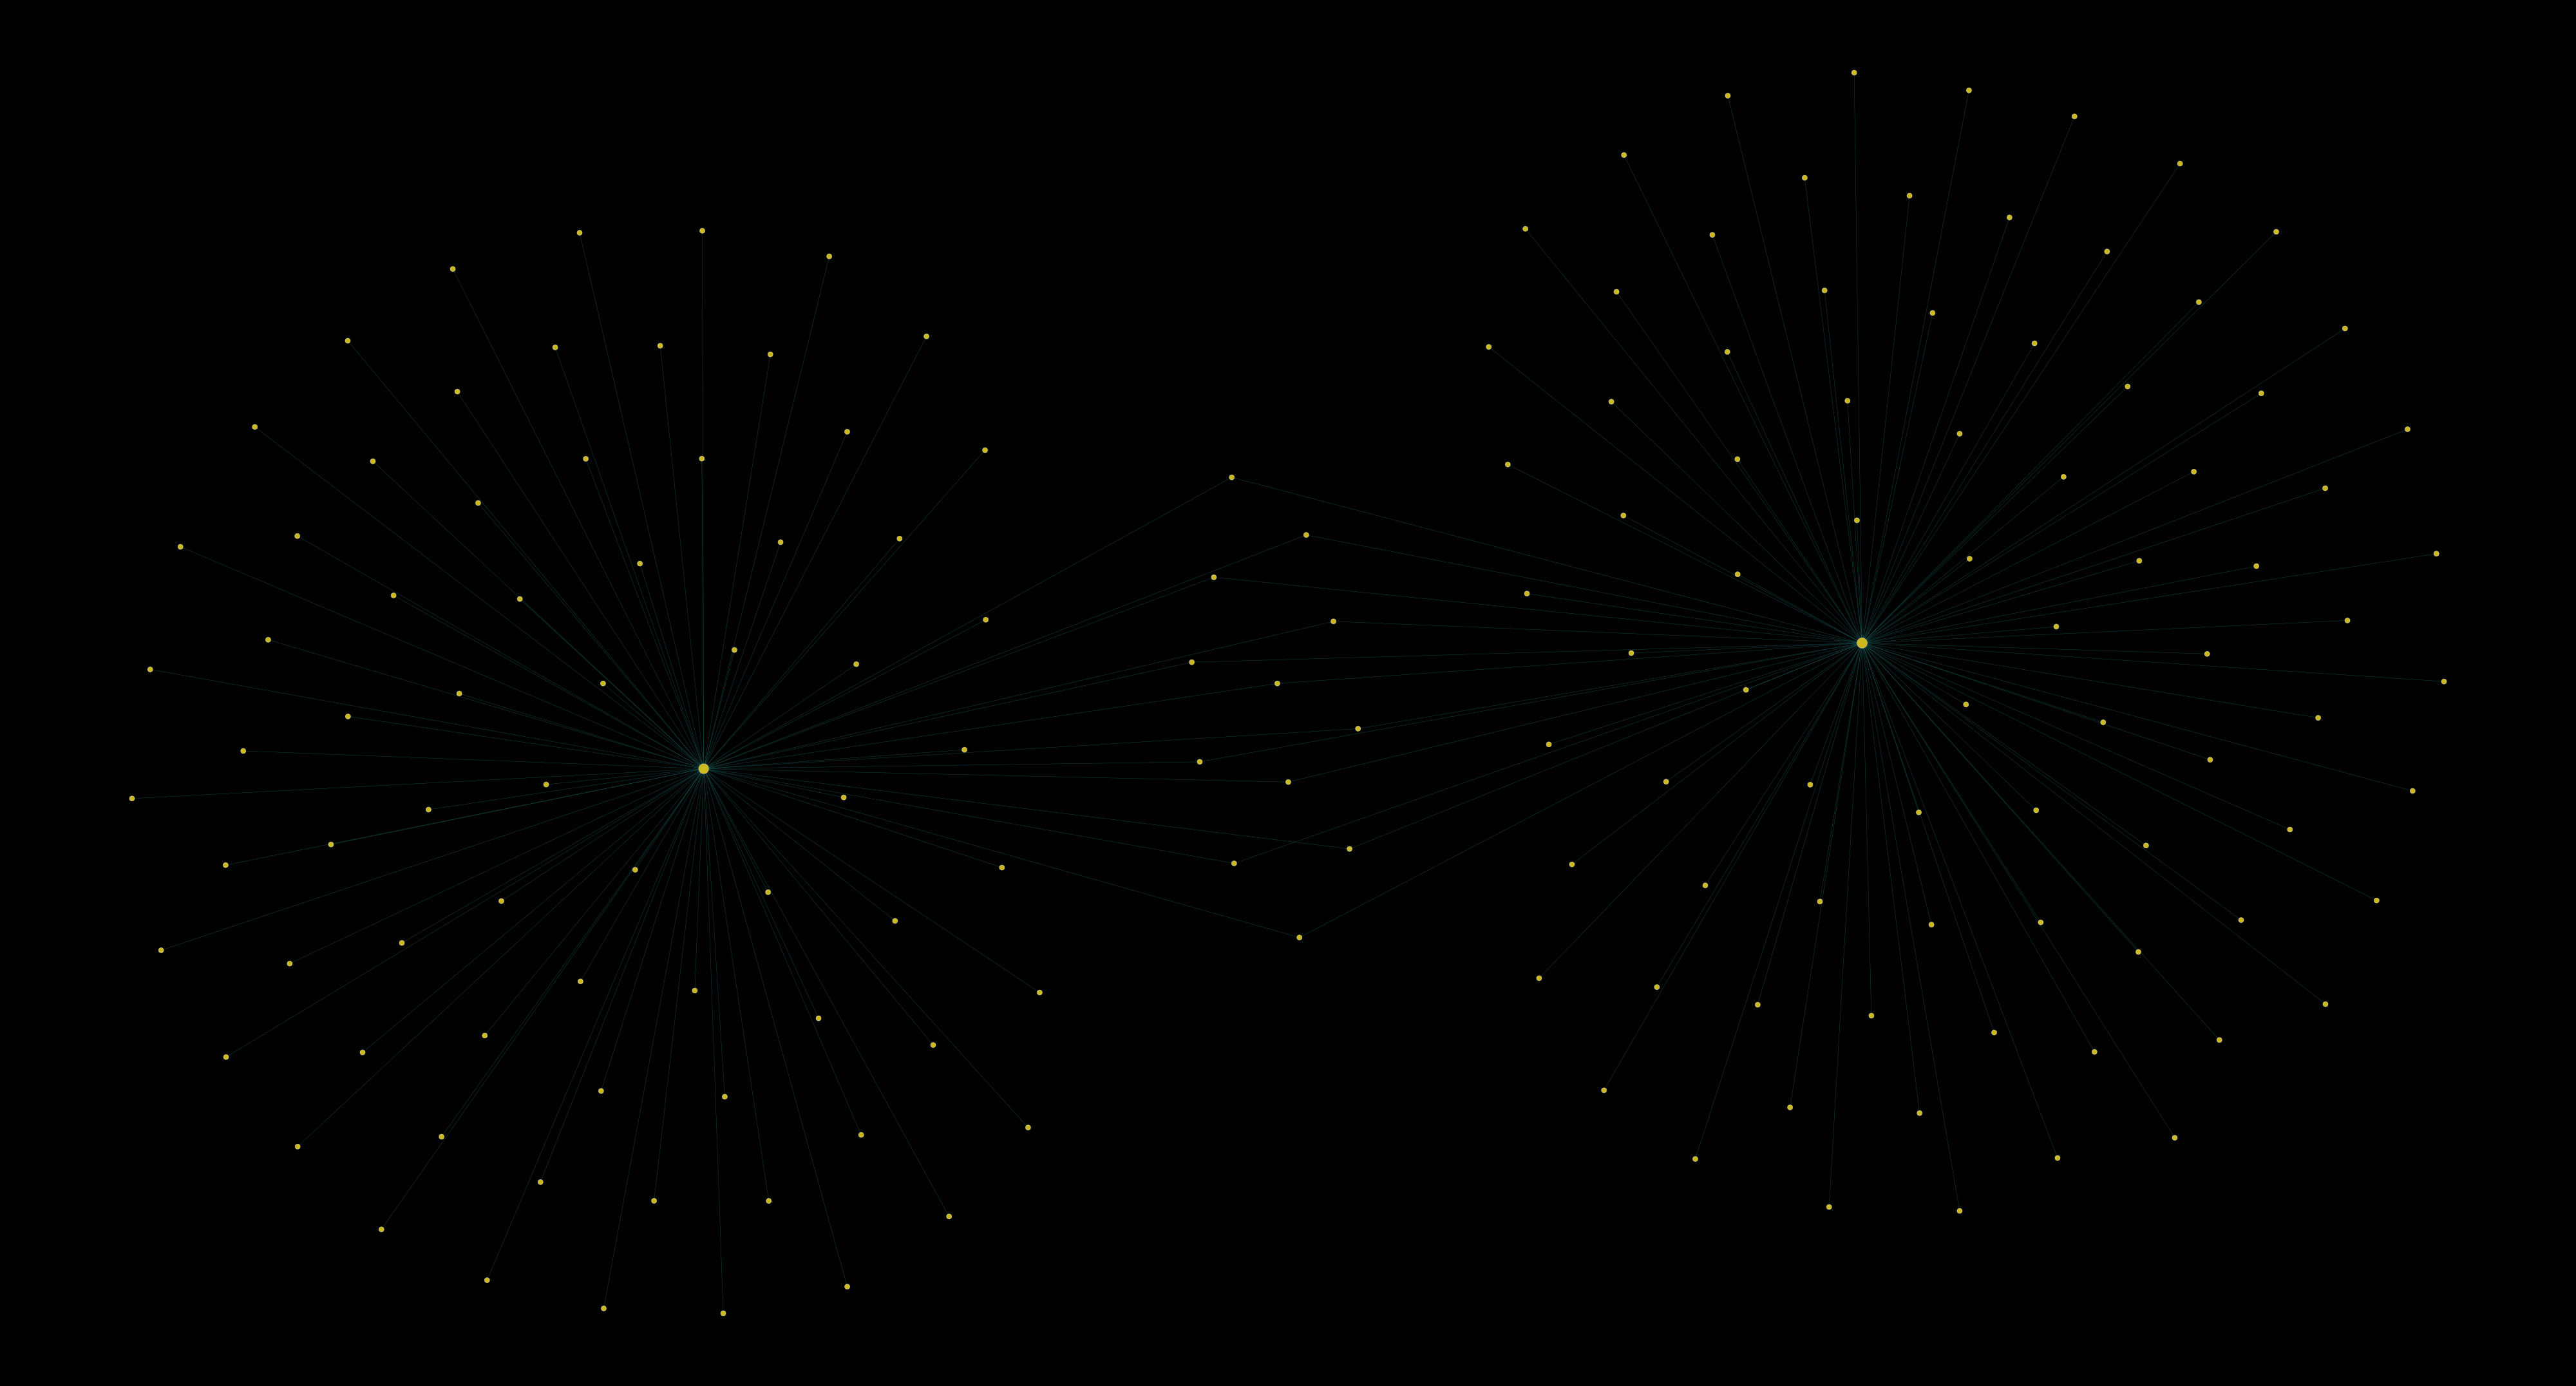

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fbe135701f0, at 0x7fbe13570b80>

In [238]:
largest_comp = gt.GraphView(g, vfilt=gt.label_largest_component(g, directed=False))
largest_comp = gt.Graph(largest_comp, prune=True)

pos = gt.sfdp_layout(largest_comp)

deg = largest_comp.degree_property_map("in")

gt.graph_draw(
    largest_comp,
    pos=pos,
    output_size=(2000, 2000),
    vertex_fill_color=[*matplotlib.cm.viridis.colors[-1], .8],
    vertex_size=gt.prop_to_size(deg, mi=4, ma=8),
    vertex_color=[1, 1, 1, 0.5],
    edge_color=[*matplotlib.cm.viridis.colors[128], .6],
    edge_pen_width=gt.prop_to_size(largest_comp.ep["n_weights"], mi=0.2, ma=1, power=1),
    bg_color=[0, 0, 0, 1],
)

